In [1]:
# Load libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD

from sklearn.model_selection import GridSearchCV
#Libraries for Saving the Model
from pickle import dump
from pickle import load
import lightgbm as lgb

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('train.csv')
dataset.fillna(dataset.median(),inplace=True)
dataset.drop(columns=['id','product_code'],inplace=True)

In [4]:
dataset = pd.get_dummies(dataset,columns=['attribute_0','attribute_1'])

In [5]:
print('%d zeros | %d ones' % (len(dataset[dataset['failure'] == 0]),len(dataset[dataset['failure'] == 1])))

20921 zeros | 5649 ones


In [6]:
X = dataset.loc[:,dataset.columns != 'failure']
Y = dataset['failure']

In [7]:
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [8]:
df = pd.concat([X_train, Y_train], axis=1)

In [9]:

failure_df = df.loc[df['failure'] == 1]
nonfailure_df = df.loc[df['failure'] == 0][:4504]

normal_distributed_df = pd.concat([failure_df, nonfailure_df])

# Shuffle dataframe rows
df_new = normal_distributed_df.sample(frac=1, random_state=42)
# split out validation dataset for the end
Y_train_new = df_new["failure"]
X_train_new = df_new.loc[:, df_new.columns != 'failure']

In [10]:
len(failure_df)

4504

In [11]:
X_train_new

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,attribute_0_material_5,attribute_0_material_7,attribute_1_material_5,attribute_1_material_6,attribute_1_material_8
10451,93.06,5,8,4,9,6,16.214,11.033,16.608,17.441,...,16.504,16.944,17.095,15.470,699.577,0,1,0,0,1
26459,140.38,6,9,5,4,10,18.816,11.476,18.002,15.807,...,17.330,18.457,15.205,12.503,601.360,0,1,0,1,0
17915,116.20,6,6,3,14,6,16.466,11.340,17.944,17.253,...,16.494,15.766,13.285,17.684,532.334,0,1,1,0,0
7015,155.47,8,8,12,7,6,17.927,11.848,16.968,17.986,...,19.355,17.224,16.543,18.112,684.044,1,0,1,0,0
130,88.29,9,5,14,2,0,19.753,10.841,16.173,17.254,...,15.510,15.946,13.387,14.712,568.145,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20628,92.34,6,6,6,15,6,17.754,12.004,16.362,17.851,...,14.984,16.178,14.260,16.436,688.472,0,1,1,0,0
25218,105.68,6,9,6,10,5,15.069,13.692,18.438,17.728,...,14.751,14.828,14.572,12.927,922.315,0,1,0,1,0
6547,129.11,8,8,6,5,6,18.128,12.649,16.293,17.415,...,17.224,16.971,17.427,18.482,778.343,1,0,1,0,0
11491,136.48,5,8,4,8,11,21.090,12.030,17.626,17.939,...,16.751,13.337,16.806,18.538,809.629,0,1,0,0,1


Distribution of the failure in the subsample dataset
0    0.5
1    0.5
Name: failure, dtype: float64


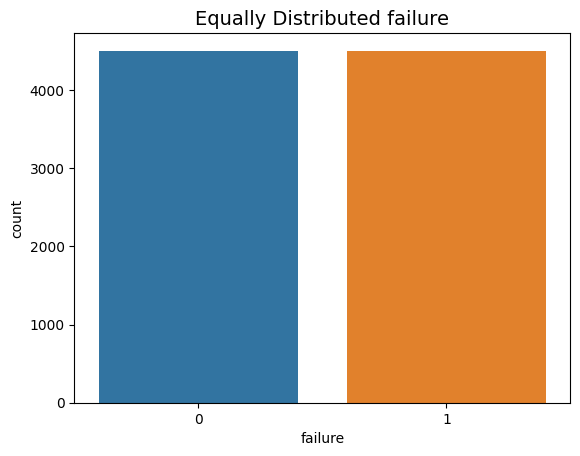

In [12]:
print('Distribution of the failure in the subsample dataset')
print(df_new['failure'].value_counts()/len(df_new))
sns.countplot('failure', data=df_new)
pyplot.title('Equally Distributed failure', fontsize=14)
pyplot.show()

In [13]:
scoring='accuracy'
num_folds = 10
seed = 7

In [14]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
#Neural Network
models.append(('NN', MLPClassifier()))
# #Ensable Models 
# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))

In [15]:
# EnableDLModelsFlag = 1
# if EnableDLModelsFlag == 1 :   
#     # Function to create model, required for KerasClassifier
#     def create_model(neurons=12, activation='relu', learn_rate = 0.01, momentum=0):
#         # create model
#         model = Sequential()
#         model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], activation=activation))
#         model.add(Dense(32, activation=activation))
#         model.add(Dense(1, activation='sigmoid'))
#         # Compile model
#         optimizer = SGD(lr=learn_rate, momentum=momentum)
#         model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#         return model    
#     models.append(('DNN', KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=0)))

In [16]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train_new, Y_train_new, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.558394 (0.020451)
LDA: 0.553397 (0.019418)
KNN: 0.515762 (0.017223)
CART: 0.505550 (0.013102)
NB: 0.538080 (0.024198)
SVM: 0.554951 (0.019453)
NN: 0.536526 (0.016666)
AB: 0.548627 (0.014395)
GBM: 0.541741 (0.015469)
RF: 0.533522 (0.018324)
ET: 0.526087 (0.010634)


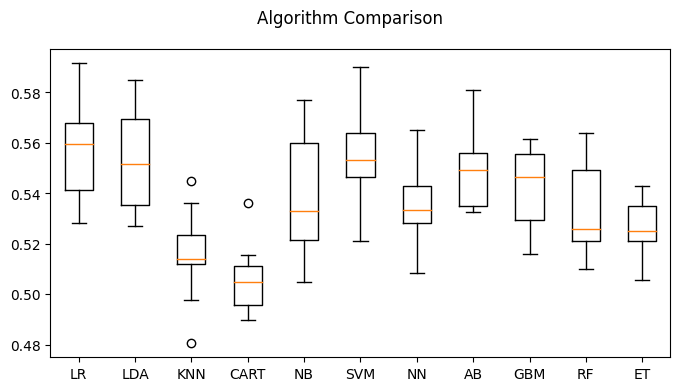

In [17]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,4)
pyplot.show()

In [18]:
n_estimators = [20,180,1000]
max_depth= [2, 3,5]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)
model = GradientBoostingClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train_new, Y_train_new)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

In [19]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

grid.fit(X_train_new, Y_train_new)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [ ]:
print(grid.best_params_)

{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}


In [24]:
model = SVC(C= 0.1, gamma= 0.0001, kernel= 'rbf')
model.fit(X_train_new, Y_train_new)

LogisticRegression(C=1000.0)

In [25]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.5971019947308995
[[2596 1573]
 [ 568  577]]
              precision    recall  f1-score   support

           0       0.82      0.62      0.71      4169
           1       0.27      0.50      0.35      1145

    accuracy                           0.60      5314
   macro avg       0.54      0.56      0.53      5314
weighted avg       0.70      0.60      0.63      5314



In [26]:
filename = 'finalized_model.pkl'
dump(model, open(filename, 'wb'))